In [2]:
# Lab: Support Vector Machines

import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

roc_curve = RocCurveDisplay.from_estimator  # shorthand

In [3]:
# 9.6.1 Support Vector Classifier

rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y == 1] += 1

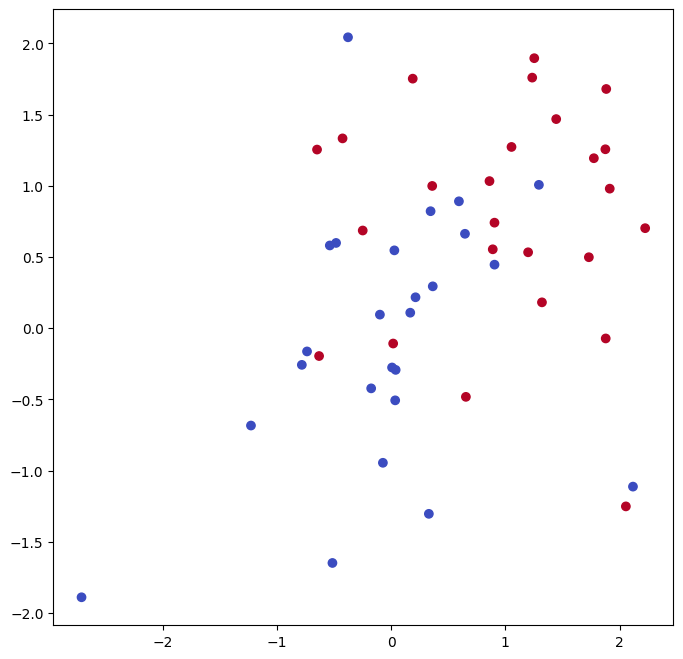

In [4]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)

In [5]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

,C,10
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


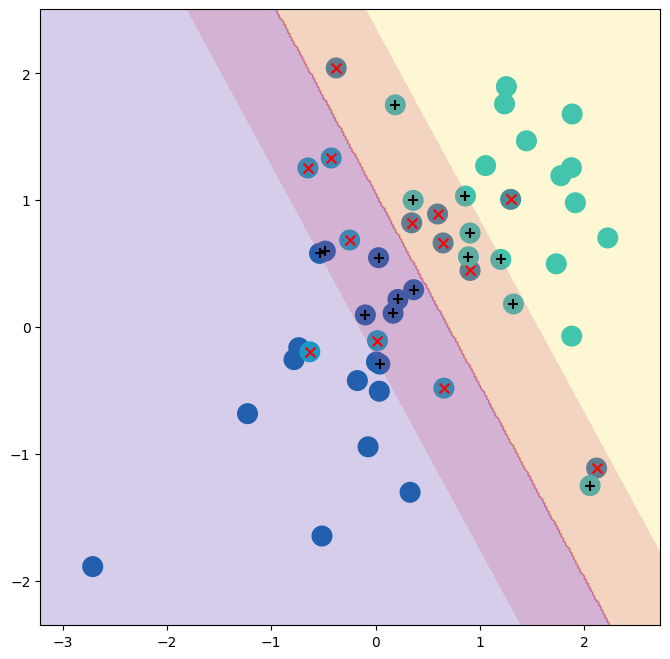

In [6]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X, y, svm_linear, ax=ax)

In [8]:
print("Linear SVM Coefficients:\n", svm_linear.coef_)


Linear SVM Coefficients:
 [[1.17303943 0.77348227]]


In [9]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(SVC(kernel='linear'),
                        {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)


,estimator,SVC(kernel='linear')
,param_grid,"{'C': [0.001, 0.01, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [10]:
print("Best Parameters from Grid Search:", grid.best_params_)
print("Mean Test Scores:", grid.cv_results_['mean_test_score'])

Best Parameters from Grid Search: {'C': 1}
Mean Test Scores: [0.46 0.46 0.72 0.74 0.74 0.74 0.74]


In [11]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1] * 10 + [1] * 10)
X_test[y_test == 1] += 1

In [12]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
print("Confusion Table (Best Estimator):")
print(confusion_table(y_test_hat, y_test))

Confusion Table (Best Estimator):
Truth      -1   1
Predicted        
-1          8   4
 1          2   6


In [13]:
svm_ = SVC(C=0.001, kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
print("Confusion Table (C=0.001):")
print(confusion_table(y_test_hat, y_test))

Confusion Table (C=0.001):
Truth      -1   1
Predicted        
-1          2   0
 1          8  10


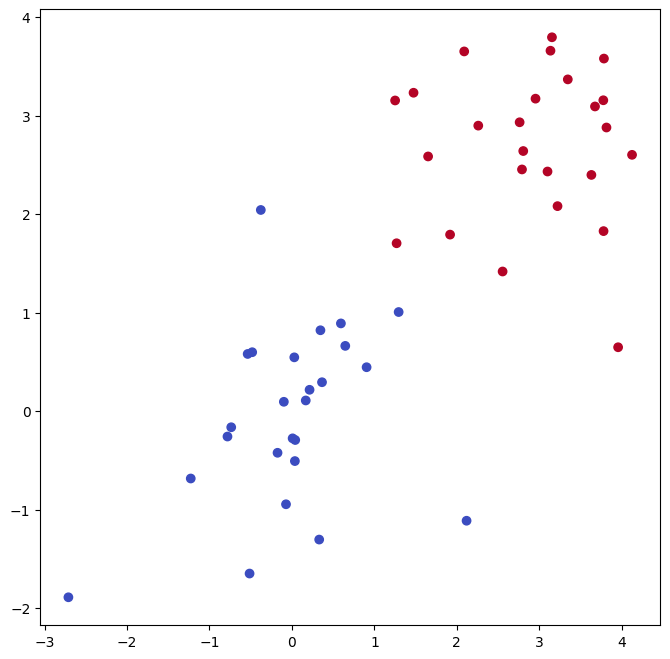

In [14]:
X[y == 1] += 1.9
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)

In [15]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
print("Confusion Table (C=1e5):")
print(confusion_table(y_hat, y))

Confusion Table (C=1e5):
Truth      -1   1
Predicted        
-1         25   0
 1          0  25


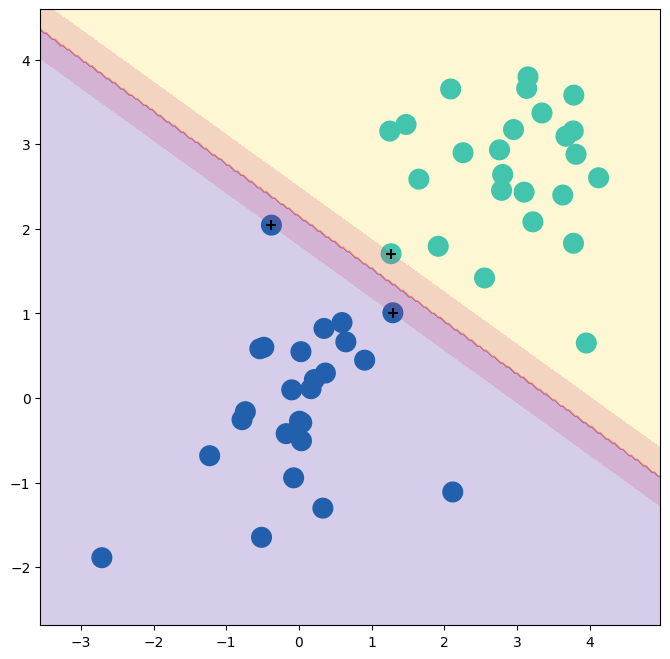

In [16]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X, y, svm_, ax=ax)

In [17]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
print("Confusion Table (C=0.1):")
print(confusion_table(y_hat, y))

Confusion Table (C=0.1):
Truth      -1   1
Predicted        
-1         25   0
 1          0  25


In [18]:
# 9.6.2 Support Vector Machine (Non-linear)

X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1] * 150 + [2] * 50)

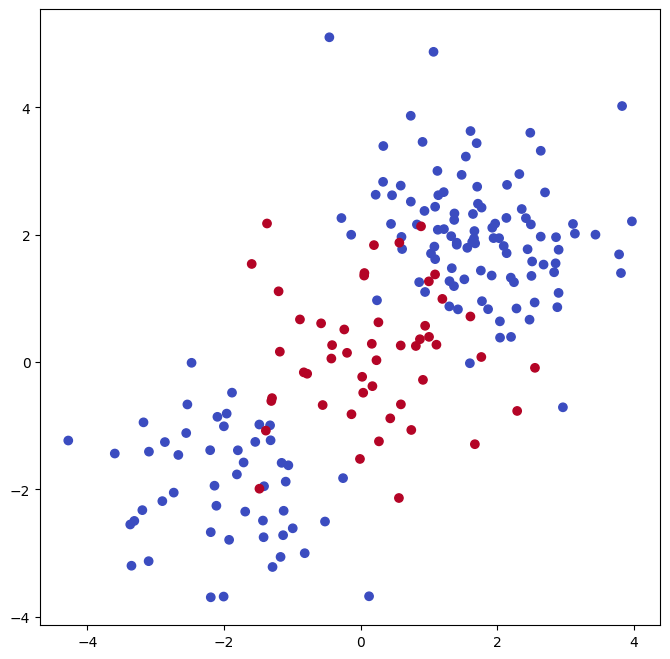

In [19]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)

In [20]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.5, random_state=0)

In [21]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train)


,C,1
,kernel,'rbf'
,degree,3
,gamma,1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


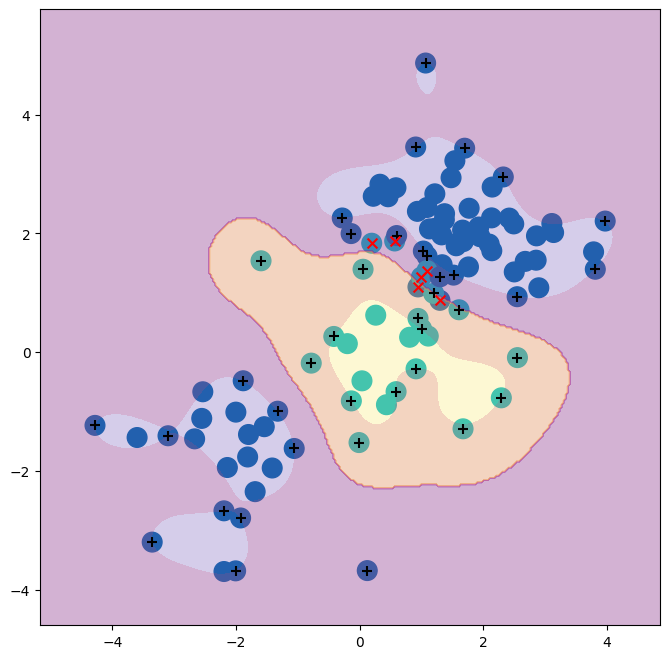

In [22]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

In [23]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)

,C,100000.0
,kernel,'rbf'
,degree,3
,gamma,1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


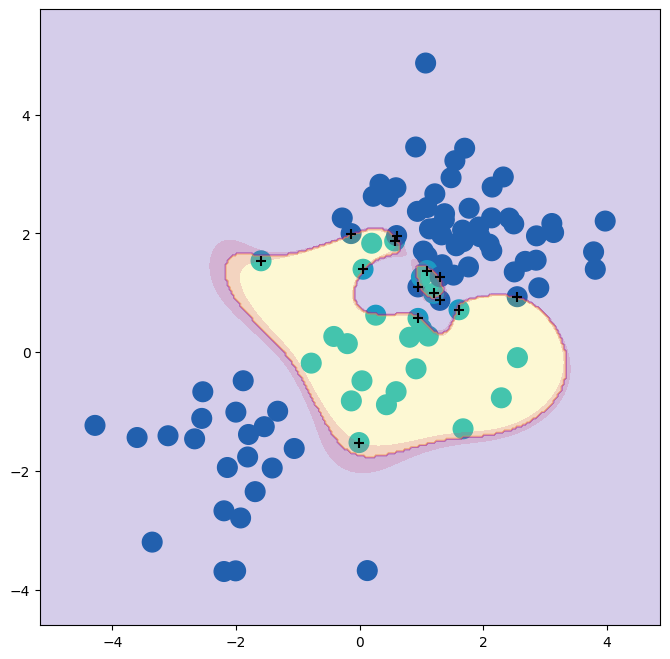

In [24]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)


In [25]:
grid = skm.GridSearchCV(SVC(kernel='rbf'),
                        {'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.5, 1, 2, 3, 4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.5, 1, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [26]:
print("Best Parameters (RBF):", grid.best_params_)

Best Parameters (RBF): {'C': 1, 'gamma': 0.5}


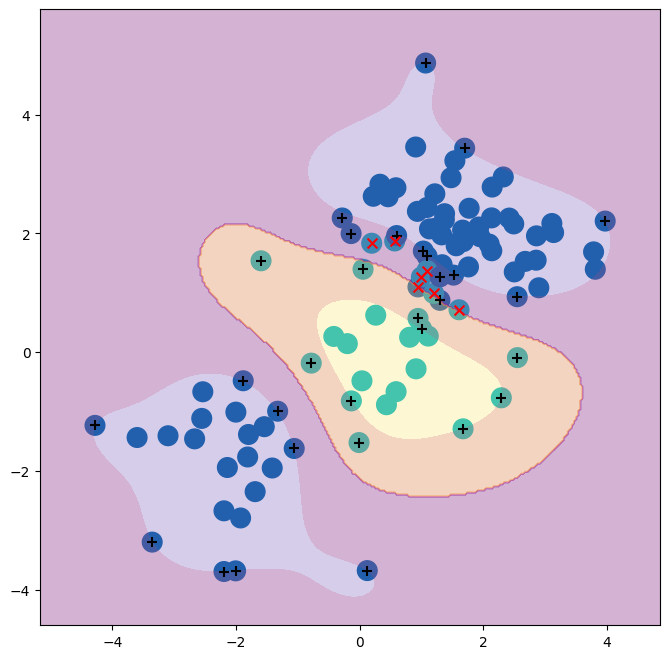

In [27]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8, 8))
plot_svm(X_train, y_train, best_svm, ax=ax)

In [28]:
y_hat_test = best_svm.predict(X_test)
print("Confusion Table (Best RBF):")
print(confusion_table(y_hat_test, y_test))

Confusion Table (Best RBF):
Truth       1   2
Predicted        
1          69   6
2           6  19


C:\Python310\lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


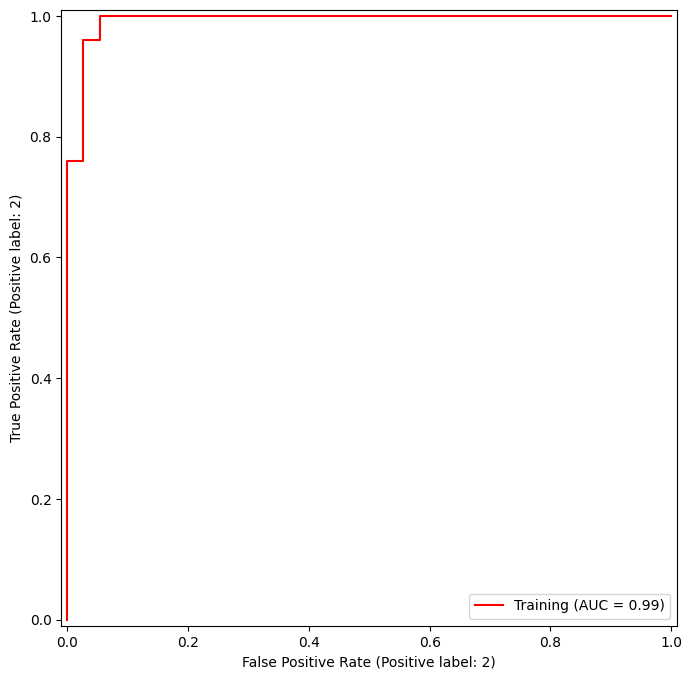

In [29]:
# 9.6.3 ROC Curves

fig, ax = subplots(figsize=(8, 8))
roc_curve(best_svm, X_train, y_train, name='Training', color='r', ax=ax)

In [30]:
svm_flex = SVC(kernel="rbf", gamma=50, C=1, probability=True)
svm_flex.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,50
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


C:\Python310\lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


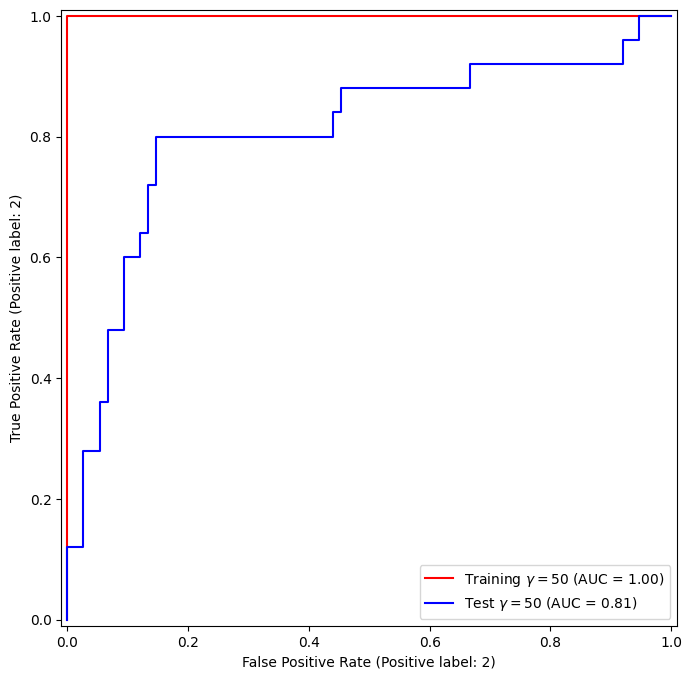

In [31]:
fig, ax = subplots(figsize=(8, 8))
roc_curve(svm_flex, X_train, y_train, name='Training $\gamma=50$', color='r', ax=ax)
roc_curve(svm_flex, X_test, y_test, name='Test $\gamma=50$', color='b', ax=ax)

C:\Python310\lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\utils\_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


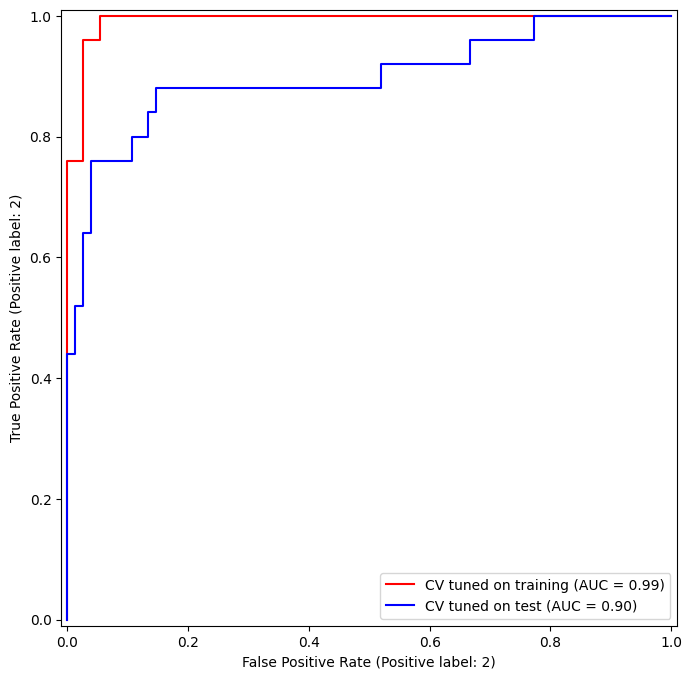

In [32]:
fig, ax = subplots(figsize=(8, 8))
for (X_, y_, c, name) in zip(
    (X_train, X_test),
    (y_train, y_test),
    ('r', 'b'),
    ('CV tuned on training', 'CV tuned on test')):
    roc_curve(best_svm, X_, y_, name=name, ax=ax, color=c)

In [33]:
# 9.6.4 SVM with Multiple Classes

rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0] * 50])
X[y == 0, 1] += 2

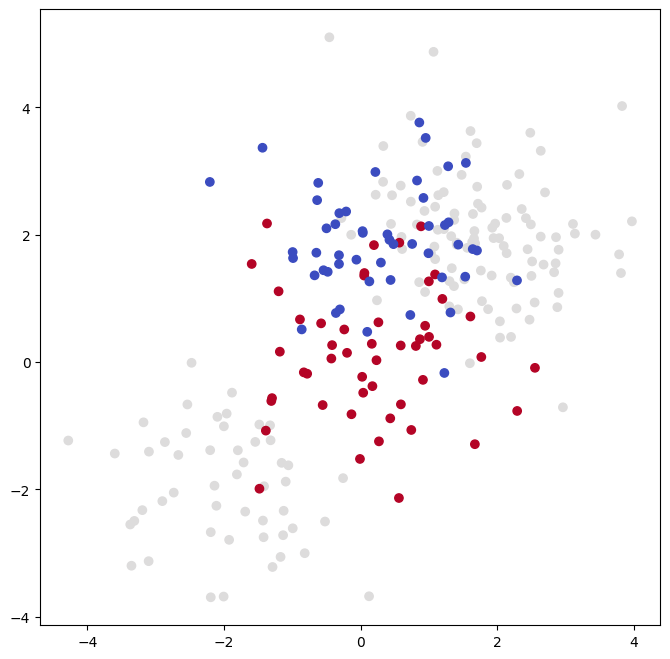

In [34]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)

In [35]:
svm_rbf_3 = SVC(kernel="rbf", C=10, gamma=1, decision_function_shape='ovo')
svm_rbf_3.fit(X, y)

,C,10
,kernel,'rbf'
,degree,3
,gamma,1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


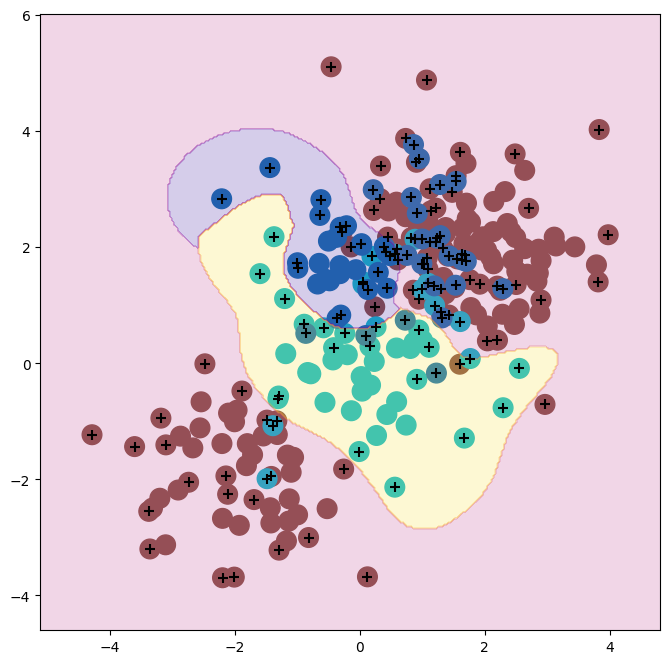

In [36]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X, y, svm_rbf_3, scatter_cmap=cm.tab10, ax=ax)

In [37]:
# 9.6.5 Application to Gene Expression Data

Khan = load_data('Khan')
print("Shapes:", Khan['xtrain'].shape, Khan['xtest'].shape)

Shapes: (63, 2308) (20, 2308)


In [38]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])

,C,10
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [39]:
print("Confusion Table (Khan Train):")
print(confusion_table(khan_linear.predict(Khan['xtrain']), Khan['ytrain']))

Confusion Table (Khan Train):
Truth      1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


In [40]:
print("Confusion Table (Khan Test):")
print(confusion_table(khan_linear.predict(Khan['xtest']), Khan['ytest']))

Confusion Table (Khan Test):
Truth      1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5
